In [82]:
import json
import os
from tqdm import tqdm_notebook
import numpy as np

In [85]:
RESULTS_FOLDER = "../results"
PREFIX_SIZE = len("regression_")
SUFFUX_SIZE = len("_2021-09-12 08:03:12.537362.json")

In [86]:
results = {}
for filename in tqdm_notebook(os.listdir(RESULTS_FOLDER)):
    if not filename.endswith(".json"):
        continue
    model_name = filename[PREFIX_SIZE:-SUFFUX_SIZE]
    print(model_name)
    with open(f"{RESULTS_FOLDER}/{filename}") as result_file:
        results[model_name] = results.get(model_name, [])
        results[model_name].append(json.load(result_file))

/home/pet67/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/52 [00:00<?, ?it/s]

SimpleNetBase_WithLSTM__CNANNELS_6_11__LAG_1500_1500__80MELS
SimpleNetBase_WithLSTM__CNANNELS_18_23__LAG_1500_0__80MELS
SimpleNetBase_WithLSTM__CNANNELS_24_29__LAG_1500_0__80MELS
SimpleNetBase_WithLSTM__CNANNELS_6_10__LAG_1500_0__80MELS
SimpleNetBase_WithLSTM__CNANNELS_6_11__LAG_0_1500__80MELS
SimpleNetBase_WithLSTM__CNANNELS_24_29__LAG_1500_0__80MELS
SimpleNetBase_WithLSTM__CNANNELS_0_5__LAG_1500_0__80MELS
SimpleNetBase_WithLSTM__CNANNELS_18_23__LAG_1500_0__80MELS
SimpleNetBase_WithLSTM__CNANNELS_18_23__LAG_1500_0__80MELS
SimpleNetBase_WithLSTM__CNANNELS_6_11__LAG_1500_0__80MELS
SimpleNetBase_WithLSTM__CNANNELS_6_11__LAG_1500_0__80MELS
SimpleNetBase_WithLSTM__CNANNELS_12_17__LAG_1500_0__80MELS
LargeNet__CNANNELS_6_11__LAG_1500_1500__80MELS
SimpleNetBase_WithLSTM__CNANNELS_6_11__LAG_0_1500__80MELS
SimpleNetBase_WithLSTM__CNANNELS_24_29__LAG_1500_0__80MELS
SimpleNetBase_WithLSTM__CNANNELS_24_29__LAG_1500_0__80MELS
SimpleNetBase_WithLSTM__CNANNELS_6_11__LAG_0_1500__80MELS
SimpleNetBase_W

In [ ]:
# result["train_corr"] = np.mean(corr_multiple(*get_random_predictions(bench_model.model, train_generator, METRIC_ITERATIONS)))
# result["val_corr"] = np.mean(corr_multiple(*get_random_predictions(bench_model.model, val_generator, METRIC_ITERATIONS)))
# result["test_corr"] = np.mean(corr_multiple(*get_random_predictions(bench_model.model, test_generator, METRIC_ITERATIONS)))
# result["train_logs"] = bench_model.logger.train_logs
# result["val_logs"] = bench_model.logger.test_logs
# result["iterations"] = MAX_ITERATIONS_COUNT

In [92]:
list(results.keys())

['SimpleNetBase_WithLSTM__CNANNELS_6_11__LAG_1500_1500__80MELS',
 'SimpleNetBase_WithLSTM__CNANNELS_18_23__LAG_1500_0__80MELS',
 'SimpleNetBase_WithLSTM__CNANNELS_24_29__LAG_1500_0__80MELS',
 'SimpleNetBase_WithLSTM__CNANNELS_6_10__LAG_1500_0__80MELS',
 'SimpleNetBase_WithLSTM__CNANNELS_6_11__LAG_0_1500__80MELS',
 'SimpleNetBase_WithLSTM__CNANNELS_0_5__LAG_1500_0__80MELS',
 'SimpleNetBase_WithLSTM__CNANNELS_6_11__LAG_1500_0__80MELS',
 'SimpleNetBase_WithLSTM__CNANNELS_12_17__LAG_1500_0__80MELS',
 'LargeNet__CNANNELS_6_11__LAG_1500_1500__80MELS']

In [87]:
results_pandas = []
for model_name, model_results in results.items():
    for model_result in model_results:
        results_pandas.append({"correlation": model_result["test_corr"], "model": model_name})


In [88]:
pandas_data_full = pd.DataFrame(results_pandas)

def boxplot_models(models_to_plot):
    models_names = list(map(lambda x: x["model_name"], models_to_plot))
    models_name_map = {x["model_name"]: x["model_plot_name"] for x in models_to_plot}
    models_plot_names = list(map(lambda x: x["model_plot_name"], models_to_plot))
    pandas_data_selected = pandas_data_full[pandas_data_full["model"].isin(models_names)]
    pandas_data_selected['model'] = pandas_data_selected.apply(lambda x: models_name_map[x["model"]], axis=1)
    sns.boxplot(x="model", y="correlation", data=pandas_data_selected, order=models_plot_names) 

/home/pet67/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


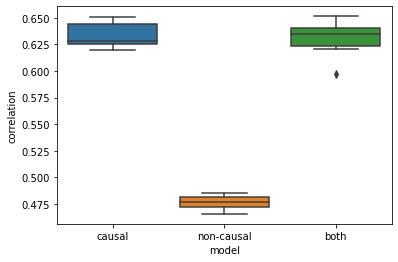

In [89]:
boxplot_models([
    {
        "model_name": 'SimpleNetBase_WithLSTM__CNANNELS_6_11__LAG_1500_0__80MELS', 
        "model_plot_name": "causal",
    },
    {
        "model_name": 'SimpleNetBase_WithLSTM__CNANNELS_6_11__LAG_0_1500__80MELS', 
        "model_plot_name": "non-causal",
    },
    {
        "model_name": 'SimpleNetBase_WithLSTM__CNANNELS_6_11__LAG_1500_1500__80MELS', 
        "model_plot_name": "both",
    },
])



/home/pet67/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


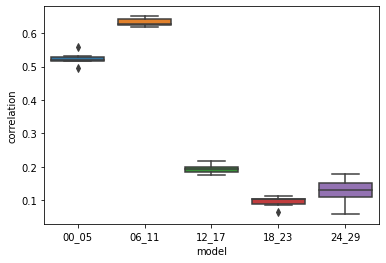

In [90]:
boxplot_models([
    {
        "model_name": 'SimpleNetBase_WithLSTM__CNANNELS_0_5__LAG_1500_0__80MELS', 
        "model_plot_name": "00_05",
    },
    {
        "model_name": 'SimpleNetBase_WithLSTM__CNANNELS_6_11__LAG_1500_0__80MELS', 
        "model_plot_name": "06_11",
    },
    {
        "model_name": 'SimpleNetBase_WithLSTM__CNANNELS_12_17__LAG_1500_0__80MELS', 
        "model_plot_name": "12_17",
    },
    {
        "model_name": 'SimpleNetBase_WithLSTM__CNANNELS_18_23__LAG_1500_0__80MELS', 
        "model_plot_name": "18_23",
    },
    {
        "model_name": 'SimpleNetBase_WithLSTM__CNANNELS_24_29__LAG_1500_0__80MELS', 
        "model_plot_name": "24_29",
    },
])

/home/pet67/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


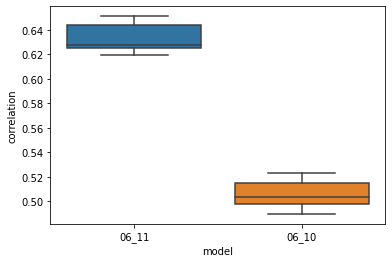

In [91]:
boxplot_models([
    {
        "model_name": 'SimpleNetBase_WithLSTM__CNANNELS_6_11__LAG_1500_0__80MELS', 
        "model_plot_name": "06_11",
    },
    {
        "model_name": 'SimpleNetBase_WithLSTM__CNANNELS_6_10__LAG_1500_0__80MELS', 
        "model_plot_name": "06_10",
    },
])

/home/pet67/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


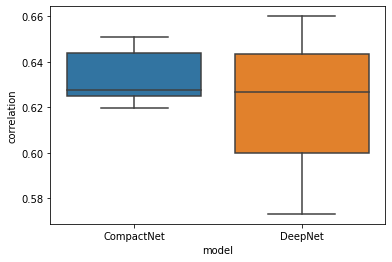

In [93]:
boxplot_models([
    {
        "model_name": 'SimpleNetBase_WithLSTM__CNANNELS_6_11__LAG_1500_0__80MELS', 
        "model_plot_name": "CompactNet",
    },
    {
        "model_name": 'LargeNet__CNANNELS_6_11__LAG_1500_1500__80MELS', 
        "model_plot_name": "DeepNet",
    },
])